NE 795 Advanced Topics in Nuclear Engineering Scientific Machine Learning
-
Homework 3: Principal Component Analysis (PCA) and Gaussian Process (GP)
-

Problem 1 - Dimensionality Reduction with PCA
-

Libraries Import:

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Iris dataset loading:

In [357]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Iris dataset creation:

In [358]:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

Dataset visualization using seaborn pairplot:

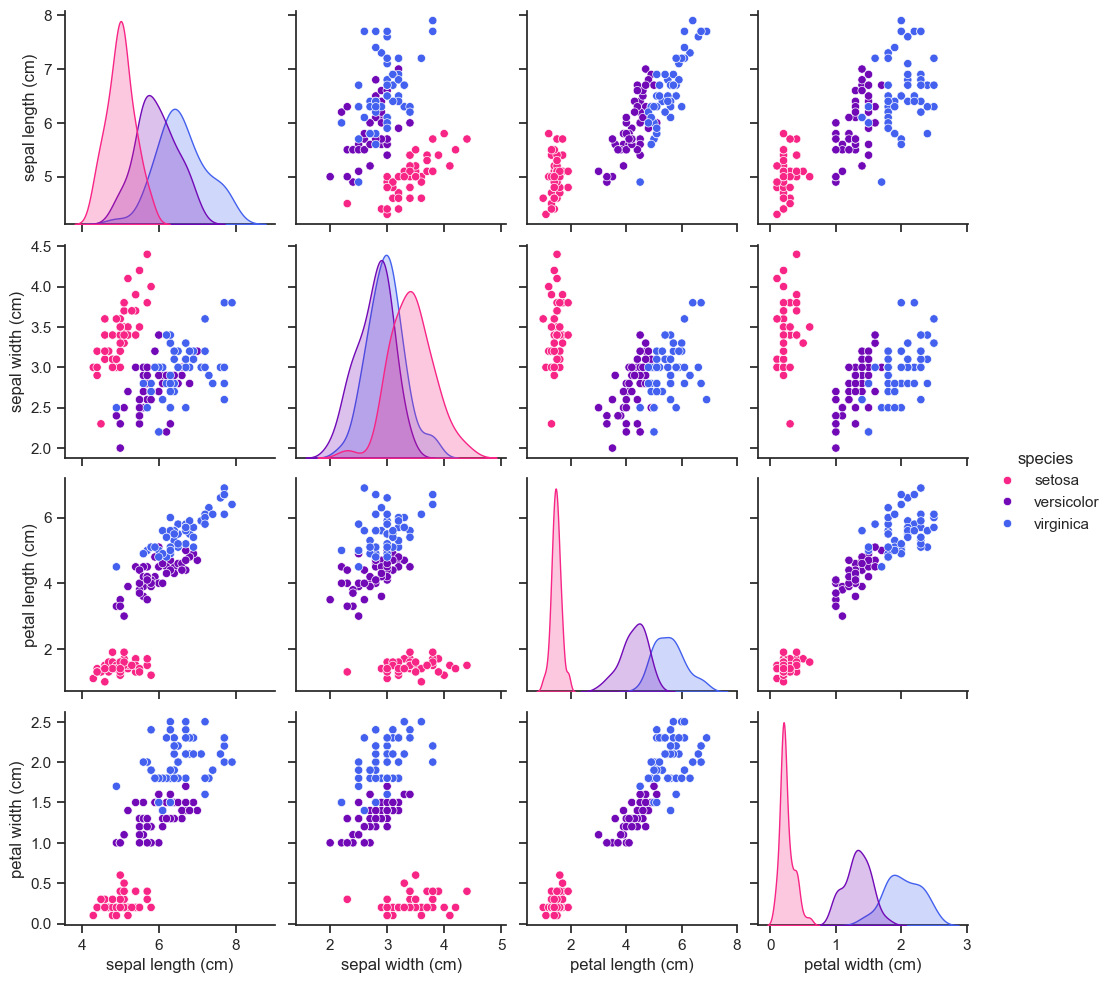

In [359]:
palette = ["#F72585", "#7209B7", "#4361EE"]
sns.set(style="ticks")
pairplot_fig = sns.pairplot(iris_df, hue='species', diag_kind='kde', palette=palette)

Dataset visualization with FacetGrid using the first two features (sepal length and sepal width):

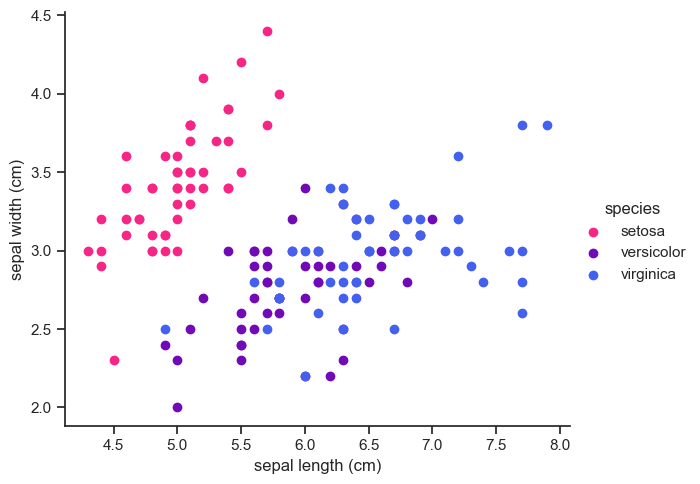

In [360]:
facet_grid = sns.FacetGrid(iris_df, hue="species", aspect=1.2, height=5, palette=palette) \
    .map(plt.scatter, feature_names[0], feature_names[1]) \
    .add_legend()

PCA attributes refer to the properties and various outputs that result from performing Principal Component Analysis (PCA) on a dataset.

 - Components: This attribute represents the principal components, which are the eigenvectors of the covariance matrix of the data. They define the directions of the new feature space. In PCA, these components are orthogonal to each other, and each component is a linear combination of the original features.

 - Explained Variance: This attribute indicates the amount of variance each principal component holds. It is derived from the eigenvalues of the covariance matrix. The explained variance indicates how much information (variance) can be attributed to each of the principal components.

 - Explained Variance Ratio: This is the percentage of variance explained by each of the selected components. It gives a sense of how important a principal component is in the context of the total variance in the dataset. The explained variance ratio is calculated by dividing the explained variance by the total variance.

 - Singular Values: These are the square roots of the eigenvalues of the covariance matrix and are related to the explained variance. The singular values are equal to the 2-norms of the 'number of components' variables in the lower-dimensional space.

 - Mean: The mean attribute holds the per-feature empirical mean, estimated from the training set, and is subtracted from the original data before projecting it onto the principal component axes.

 - n_components: It is the estimated number of components. If n_components is not set then n_components is the minimum of the number of features or samples.

 - Noise Variance: This attribute represents the estimated noise covariance following the Probabilistic PCA model. If PCA is performed without specifying the number of components, this attribute can help understand the amount of noise in the data.

When performing PCA with scikit-learn, these attributes can be accessed after fitting the PCA object with data.

PCA with two components:

In [361]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

2D data plot:

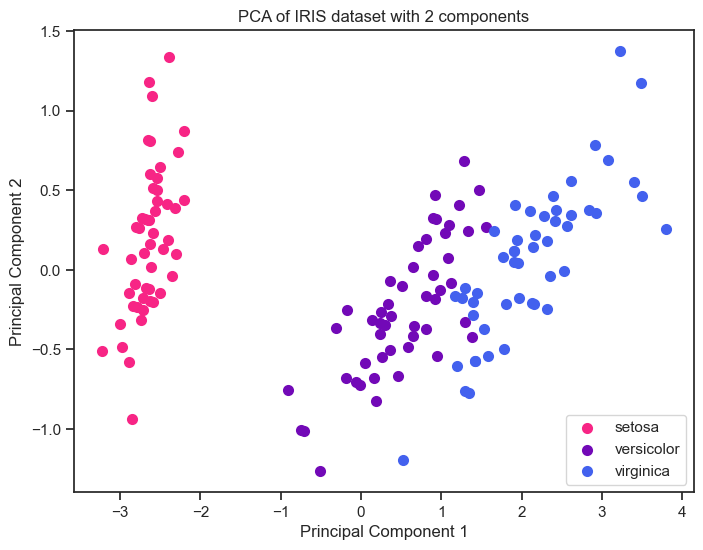

In [362]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(palette, [0, 1, 2], target_names):
    plt.scatter(X_pca_2d[y == i, 0], X_pca_2d[y == i, 1], color=color, lw=2, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset with 2 components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

The first two principal components account for approximately 92.46% and 5.31% of the variance, respectively.

PCA with three components:

In [363]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

3D data plot:

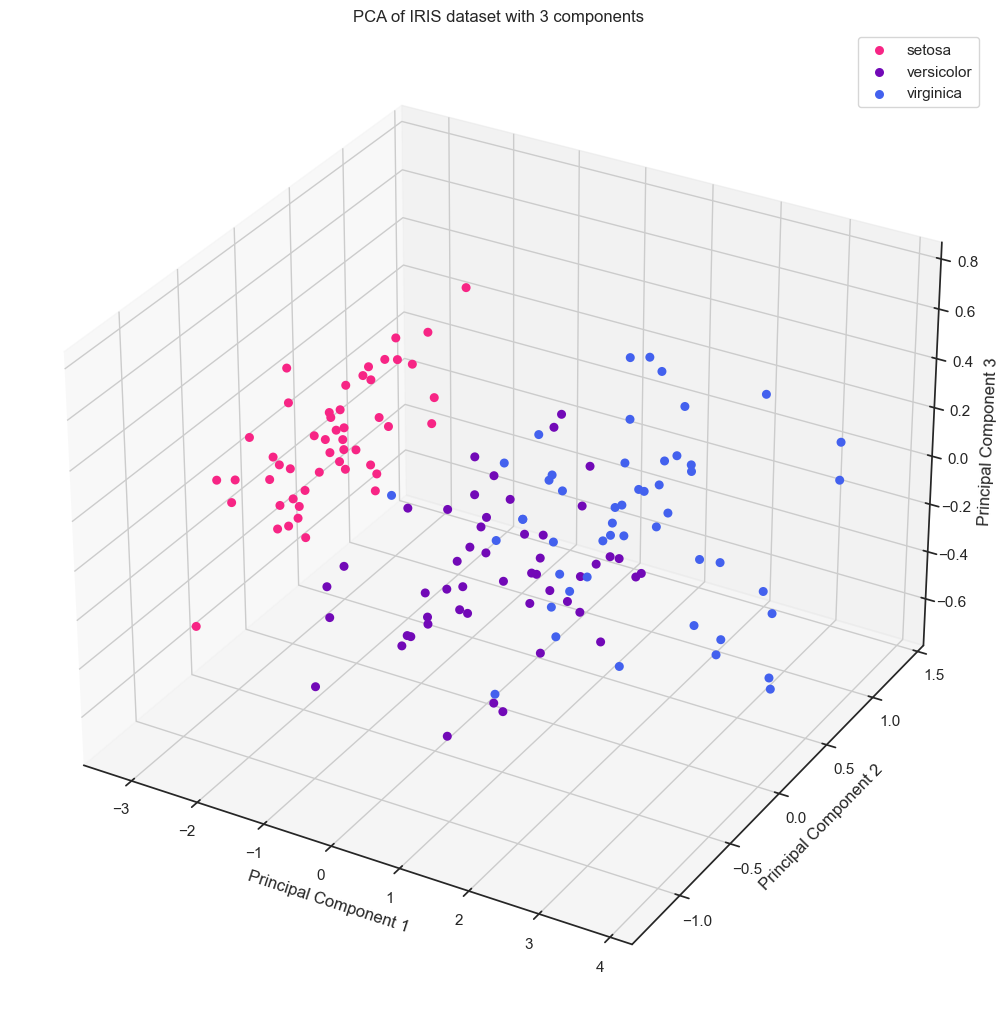

In [364]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(palette, [0, 1, 2], target_names):
    ax.scatter(X_pca_3d[y == i, 0], X_pca_3d[y == i, 1], X_pca_3d[y == i, 2], color=color, alpha=1, lw=2, label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('PCA of IRIS dataset with 3 components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.tight_layout(pad=0.1)

plt.show()

The first three principal components explain approximately 92.46%, 5.31%, and 1.71% of the variance, respectively.

Problem 2 - Gaussian Process Modeling
-

Libraries Import:

In [365]:
from scipy.io import loadmat

BISON dataset loading:

In [366]:
data = loadmat("SciML16_demo_BISON_Fission_Gas_Release_data.mat")

Data for N=100:

In [367]:
X = data['Design100']
Y = data['BISON_FGR100']
exp_fgr = data['EXP_FGR']

BISON simulation data plot (N = 100):

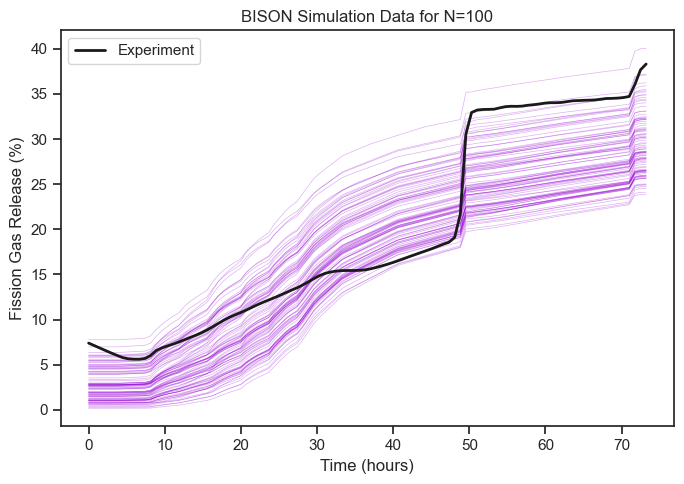

In [368]:

plt.figure(figsize=(7, 5))
for i in range(Y.shape[0]):
    plt.plot(exp_fgr[:, 0], Y[i, :], linewidth=0.5, alpha=0.3, color='#9400D3')

plt.plot(exp_fgr[:, 0], exp_fgr[:, 1], 'k-', linewidth=2, label='Experiment')

plt.title('BISON Simulation Data for N=100')
plt.xlabel('Time (hours)')
plt.ylabel('Fission Gas Release (%)')
plt.legend()
plt.tight_layout()

plt.show()

Gaussian Process with scikit-learn library:

Libraries Import:

In [369]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ConstantKernel, DotProduct
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

Data standartization:

In [370]:
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

Dimensionality reduction with PCA:

In [371]:
pca = PCA(n_components=0.99)
Y_pca = pca.fit_transform(Y)

Data split into training and testing sets:

In [372]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_pca, test_size=0.2, random_state=42)

Gaussian Process with Radial Basis Function (RBF), Rational Quadratic and Constant Kernels using scikit-learn:

In [373]:
kernel_names = {
    'RBF, zero mean function': 1.0 * RBF(length_scale=1.0),
    'RationalQuadratic, zero mean function': 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
    'Constant, zero mean function': 1.0 * ConstantKernel(constant_value=1),
    'Constant, linear mean function': DotProduct() + ConstantKernel(constant_value=1)  # Represents a linear mean function
}

for name, kernel in kernel_names.items():
    # Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
    gp.fit(X_train, Y_train)

    # Predictions
    Y_pred, Y_std = gp.predict(X_train, return_std=True)
    
    # Metrics
    mse = mean_squared_error(Y_train, Y_pred)
    mae = mean_absolute_error(Y_train, Y_pred)
    q2 = r2_score(Y_train, Y_pred)
    
    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()
    loo_mse =  - cross_val_score(gp, X_scaled, Y_pca, cv=loo, scoring='neg_mean_squared_error').mean()
    loo_mae =  - cross_val_score(gp, X_scaled, Y_pca, cv=loo, scoring='neg_mean_absolute_error').mean()
    
    # Variance magnitude
    mean_variance = np.mean(Y_std ** 2)
    
    # Metrics' values for the current kernel output
    print(f"Kernel: {name}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"Q2 Predictivity: {q2}")
    print(f"LOO MSE: {loo_mse}")
    print(f"LOO MAE: {loo_mae}")
    print(f"Mean Variance of Predictions: {mean_variance}")
    print("\n")

Kernel: RBF, zero mean function
MSE: 1.782855113552875e-16
MAE: 7.4381038704034e-09
Q2 Predictivity: 1.0
LOO MSE: 19.6801485616864
LOO MAE: 2.551573567680435
Mean Variance of Predictions: 5.02218458621732e-08


Kernel: RationalQuadratic, zero mean function
MSE: 7.816280512335056e-18
MAE: 1.6300699924522329e-09
Q2 Predictivity: 1.0
LOO MSE: 38.48240465194748
LOO MAE: 3.421122455182253
Mean Variance of Predictions: 5.0221923225722604e-08


Kernel: Constant, zero mean function
MSE: 502.2190304656977
MAE: 14.73047153384757
Q2 Predictivity: -9.413425594573255e-11
LOO MSE: 511.8883602447061
LOO MAE: 14.88918491309906
Mean Variance of Predictions: 6.278184459534465e-10


Kernel: Constant, linear mean function
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.7481639962272677
LOO MSE: 50.26534269327331
LOO MAE: 4.624288019776203
Mean Variance of Predictions: 3.766740615305736e-09




Gaussian Process with GPflow library:

Libraries Import:

In [374]:
import gpflow
from gpflow.kernels import RBF, RationalQuadratic, Constant
from gpflow.mean_functions import Linear, Zero
import numpy as np
import tensorflow as tf

In [375]:
# Convert X and Y to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.float64)

# Kernels
kernels = {
    'RBF': RBF(),
    'RationalQuadratic': RationalQuadratic(),
    'Constant': Constant(),
}

# Mean functions
zero_mean_function = Zero()
linear_mean_function = Linear(A=np.zeros((X_train.shape[1], 1)))

mean_functions = {
    'Zero': zero_mean_function,
    'Linear': linear_mean_function,
}

for kernel_name, kernel in kernels.items():
    for mean_name, mean_function in mean_functions.items():
        # GP model with the specified kernel and mean function
        model = gpflow.models.GPR(data=(X_train, Y_train), kernel=kernel, mean_function=mean_function)
        
        # Model optimization
        optimizer = gpflow.optimizers.Scipy()
        optimizer.minimize(model.training_loss, model.trainable_variables)
        
        # Predictions and variances
        Y_pred, Y_var = model.predict_f(X_train)
        
        # Q2 Predictivity
        q2 = r2_score(Y_train.numpy(), Y_pred.numpy())
        
        # Leave-One-Out Cross-Validation for MSE and MAE
        loo_mse_values = []
        loo_mae_values = []

        for i in range(X_train.shape[0]):
            mask = np.ones(X_train.shape[0], dtype=bool)
            mask[i] = False
            
            X_train_loo = X_train[mask]
            Y_train_loo = Y_train[mask]
            X_test_loo = tf.reshape(X_train[~mask], (1, -1))
            Y_test_loo = tf.reshape(Y_train[~mask], (1, -1))
            
            model = gpflow.models.GPR(data=(X_train_loo, Y_train_loo), kernel=kernel, mean_function=mean_function)
            optimizer.minimize(model.training_loss, model.trainable_variables)
            
            Y_pred_loo, Y_var_loo = model.predict_f(X_test_loo)
            
            mse_loo = mean_squared_error(Y_test_loo.numpy(), Y_pred_loo.numpy())
            mae_loo = mean_absolute_error(Y_test_loo.numpy(), Y_pred_loo.numpy())
            
            loo_mse_values.append(mse_loo)
            loo_mae_values.append(mae_loo)

        loo_mse = np.mean(loo_mse_values)
        loo_mae = np.mean(loo_mae_values)
        
        # Variance magnitude
        mean_variance = np.mean(Y_var.numpy())
        
        # Print metrics for the current kernel and mean function
        print(f"Kernel: {kernel_name}, Mean Function: {mean_name}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
        print(f"Q2 Predictivity: {q2}")
        print(f"LOO MSE: {loo_mse}")
        print(f"LOO MAE: {loo_mae}")
        print(f"Mean Variance of Predictions: {mean_variance}")
        print("\n")

Kernel: RBF, Mean Function: Zero
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.9926805986459162
LOO MSE: 7.5364236354686795
LOO MAE: 1.712168091655876
Mean Variance of Predictions: 1.2098373194789758


Kernel: RBF, Mean Function: Linear
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.9974248855265564
LOO MSE: 7.041580713380631
LOO MAE: 1.6812860930284554
Mean Variance of Predictions: 0.5339241870628598


Kernel: RationalQuadratic, Mean Function: Zero
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.9999999999999776
LOO MSE: 6.435964133991911
LOO MAE: 1.5381928078647638
Mean Variance of Predictions: 9.999991164022504e-07


Kernel: RationalQuadratic, Mean Function: Linear
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.9991222421591636
LOO MSE: 6.298348668711746
LOO MAE: 1.5320616538893315
Mean Variance of Predictions: 0.36457879448155384


Kernel: Constant, Mean Function: Zero
MSE: 38.87255928783423
MAE: 4.07260698

From the comparison of the metrics, GP modeling in scikit-learn and GPflow libraries exhibits some differences:

Scikit-learn:

 - The RBF and RationalQuadratic kernels with a zero mean function give perfect Q2 scores on the training data, implying a potential overfit. However, LOO MSE is significantly higher, indicating a discrepancy when the model is applied to unseen data.
 - The Constant kernel with a zero mean function performs poorly, with large MSE and negative Q2 scores.
 - The Constant kernel with a linear mean function improves, suggesting that incorporating a linear trend benefits the model.

GPflow:

 - The GPflow models generally have lower LOO MSE and MAE compared to scikit-learn, indicating better generalization in the LOO setting.
 -  RBF kernel with both mean functions performs well, with high Q2 Predictivity and lower LOO MSE/MAE, showing robustness.
 - The RationalQuadratic kernel shows almost perfect Q2 Predictivity and very low variance, indicating a good fit to the data.
 - The Constant kernel models in GPflow show poor performance, especially the negative Q2 Predictivity with the linear mean function.

Overall, the GPflow models with RBF and RationalQuadratic kernels and zero mean functions appear to generalize better than the corresponding models in scikit-learn, as evidenced by the LOO scores. The scikit-learn models show a tendency to overfit the training data, as seen by the perfect Q2 scores. The poor performance of the Constant kernel in both libraries suggests it is not a good fit for this data.

Effect of Different Mean Functions:

- Switching from a zero mean to a linear mean function with the RBF kernel slightly improved LOO MSE and MAE, indicating a better generalization to unseen data.
 - With the RationalQuadratic kernel, the linear mean function also resulted in a slight improvement in LOO MSE and MAE.

Effect of Different Kernels:

 - The RBF and RationalQuadratic kernels significantly outperform the Constant kernel, as evidenced by much lower LOO MSE/MAE and higher Q2 scores.
 - The RationalQuadratic kernel with both mean functions provided the best LOO MSE and MAE, suggesting that it captures the complexity of the data well.
 -  Constant kernel performed poorly, particularly with the linear mean function, which resulted in a negative Q2 Predictivity.

In GPflow, the nugget term is typically handled by adding a small value to the diagonal of the covariance matrix, which is effectively adding Gaussian noise to the model. This can be done using the White kernel, which represents this noise.

In [378]:
from gpflow.kernels import White

# Uncertainty is of 5% of the data variance
data_variance = np.var(Y_train.numpy())
nugget_variance = 0.05 * data_variance

# Kernels
kernels = {
    'RBF': RBF(),
    'RationalQuadratic': RationalQuadratic(),
    'Constant': Constant(),
}

# Mean functions
zero_mean_function = Zero()
linear_mean_function = Linear(A=np.zeros((X_train.shape[1], 1)))

mean_functions = {
    'Zero': zero_mean_function,
    'Linear': linear_mean_function,
}

for kernel_name, kernel in kernels.items():

    kernel += White(variance=nugget_variance)  # Add nugget term to the kernel

    for mean_name, mean_function in mean_functions.items():
        # GP model with the specified kernel and mean function
        model = gpflow.models.GPR(data=(X_train, Y_train), kernel=kernel, mean_function=mean_function)
        
        # Model optimization
        optimizer = gpflow.optimizers.Scipy()
        optimizer.minimize(model.training_loss, model.trainable_variables)
        
        # Predictions and variances
        Y_pred, Y_var = model.predict_f(X_train)
        
        # Q2 Predictivity
        q2 = r2_score(Y_train.numpy(), Y_pred.numpy())
        
        # Leave-One-Out Cross-Validation for MSE and MAE
        loo_mse_values = []
        loo_mae_values = []

        for i in range(X_train.shape[0]):
            mask = np.ones(X_train.shape[0], dtype=bool)
            mask[i] = False
            
            X_train_loo = X_train[mask]
            Y_train_loo = Y_train[mask]
            X_test_loo = tf.reshape(X_train[~mask], (1, -1))
            Y_test_loo = tf.reshape(Y_train[~mask], (1, -1))
            
            model = gpflow.models.GPR(data=(X_train_loo, Y_train_loo), kernel=kernel, mean_function=mean_function)
            optimizer.minimize(model.training_loss, model.trainable_variables)
            
            Y_pred_loo, Y_var_loo = model.predict_f(X_test_loo)
            
            mse_loo = mean_squared_error(Y_test_loo.numpy(), Y_pred_loo.numpy())
            mae_loo = mean_absolute_error(Y_test_loo.numpy(), Y_pred_loo.numpy())
            
            loo_mse_values.append(mse_loo)
            loo_mae_values.append(mae_loo)

        loo_mse = np.mean(loo_mse_values)
        loo_mae = np.mean(loo_mae_values)
        
        # Variance magnitude
        mean_variance = np.mean(Y_var.numpy())
        
        # Print metrics for the current kernel with the nugget term and mean function
        print(f"Kernel: {kernel_name} with the nugget term, Mean Function: {mean_name}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
        print(f"Q2 Predictivity: {q2}")
        print(f"LOO MSE: {loo_mse}")
        print(f"LOO MAE: {loo_mae}")
        print(f"Mean Variance of Predictions: {mean_variance}")
        print("\n")

Kernel: RBF with the nugget term, Mean Function: Zero
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.9974305022865033
LOO MSE: 7.535165746113172
LOO MAE: 1.7116143611587007
Mean Variance of Predictions: 1.456463686116632


Kernel: RBF with the nugget term, Mean Function: Linear
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.9974246678164322
LOO MSE: 7.045411007109841
LOO MAE: 1.6820686799643467
Mean Variance of Predictions: 0.5762015657000973


Kernel: RationalQuadratic with the nugget term, Mean Function: Zero
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: 0.9999999999999778
LOO MSE: 515.0138911218903
LOO MAE: 14.916913468644514
Mean Variance of Predictions: 9.999991505083018e-07


Kernel: RationalQuadratic with the nugget term, Mean Function: Linear
MSE: 38.87255928783423
MAE: 4.0726069862968775
Q2 Predictivity: -12.657515734071184
LOO MSE: 341.0966085610442
LOO MAE: 14.446180658508592
Mean Variance of Predictions: 0.012499985245

Effect of Nugget Term:

The introduction of the nugget term seems to have a mixed impact on the metrics. For the RBF kernel, the Q2 Predictivity remains very high, indicating that the model with the nugget term continues to fit the training data well. However, there isn't a significant change in the LOO MSE and MAE.
For the RationalQuadratic kernel, the nugget term severely impacts the performance, with a notable decrease in Q2 Predictivity and an increase in LOO MSE and MAE.
The Constant kernel's performance is negatively impacted by the nugget term, with a substantial increase in the mean variance of predictions, indicating increased uncertainty in the model's predictions.

The addition of the nugget term introduces additional uncertainty into the model predictions, as expected. A GP model trained with a nugget term yields higher predictive variances at training samples, indicating the model's uncertainty about these points. This is because the model recognizes that each observation has an associated uncertainty (noise), and thus it is less confident about the data points.

To transfer the data uncertainties to the Principal Component (PC) scores after applying PCA, the following steps could be done:

1. Original Data Uncertainty Quantification.

2. Uncertainty propagetion through PCA.
    Each PC score is a linear combination of the original variables. Covariance calculation of the PCA-transformed data can propagate the uncertainties from the original data into the PC scores. However, this might be complex and not straightforward, as it involves understanding how PCA transforms the variance-covariance structure.

3. Uncertainty incorporation into the GP Model.
    Propagated uncertainties may be accounted through a nugget term in the GP model.

If the direct propagation of uncertainty is too complex or not feasible, an alternative approach is to use the uncertainties from the original data as a fixed noise level in the GP model. This would not be as precise but can serve as an approximation if the uncertainties are relatively small.

